# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train,y_train),\
(x_test,y_test)= mnist.load_data()

In [3]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [4]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [5]:
#Reshape the training and test set
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
#Padding the images by 2 pixels since in the paper input images were 32x32
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [7]:
print(x_train.shape)
print(y_train_onehot.shape)
print(x_test.shape)
print(y_test_onehot.shape)

(60000, 32, 32, 1)
(60000, 10)
(10000, 32, 32, 1)
(10000, 10)


# 建立模型

In [8]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import ZeroPadding2D
from keras.models import Model
from models import lenet

In [9]:
model=lenet(input_shape=(32,32,1),classes=10)
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 120)               48120     
_________________________________________________________________
fc2 (Dense)                  (None, 84)                10164     
__________

# 訓練模型

In [10]:
train_history=model.fit(x_train ,y_train_onehot, epochs = 10,batch_size=200,validation_split=0.2,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 357us/step - loss: 1.2767 - acc: 0.6653 - val_loss: 0.6212 - val_acc: 0.8787
Epoch 2/10
48000/48000 [==============================] - 20s 412us/step - loss: 0.4896 - acc: 0.8926 - val_loss: 0.3576 - val_acc: 0.9186
Epoch 3/10
48000/48000 [==============================] - 17s 362us/step - loss: 0.3305 - acc: 0.9205 - val_loss: 0.2741 - val_acc: 0.9323
Epoch 4/10
48000/48000 [==============================] - 19s 400us/step - loss: 0.2647 - acc: 0.9324 - val_loss: 0.2281 - val_acc: 0.9420
Epoch 5/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.2287 - acc: 0.9390 - val_loss: 0.2026 - val_acc: 0.9472
Epoch 6/10
48000/48000 [==============================] - 20s 424us/step - loss: 0.2047 - acc: 0.9432 - val_loss: 0.1838 - val_acc: 0.9507
Epoch 7/10
48000/48000 [==============================] - 17s 359us/step - loss: 0.1853 - acc: 0.9489 - val_loss: 0.

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

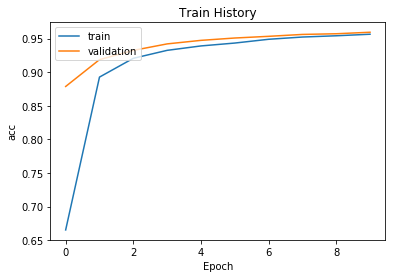

In [12]:
show_train_history(train_history,'acc','val_acc')

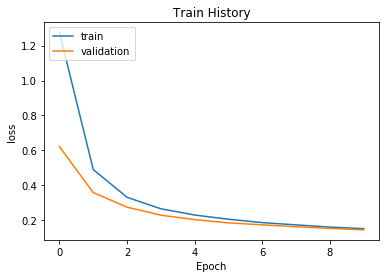

In [13]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [14]:
preds=model.evaluate(x_test,y_test_onehot)
print("Validation loss="+str(preds[0]))
print("Validation accuracy="+str(preds[1]))

10000/10000 [==============================] - 1s 138us/step
Validation loss=0.13622243605554105
Validation accuracy=0.9597


In [15]:
prediction=model.predict_classes(x_test)

10000/10000 [==============================] - 2s 172us/step


# 進行預測

In [16]:
import numpy as np
def show_images_labels_predict(images,labels,prediction_result,idx):
    fig = plt.gcf()
    fig.set_size_inches(8, 10)
    for i in range(0, 25):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(np.reshape(images[idx],(32, 32)),cmap='binary')
        ax.set_title("label=" +str(np.argmax(labels[idx]))+
                     ",predict="+str(prediction_result[idx])
                     ,fontsize=9)
        idx+=1
    plt.show()

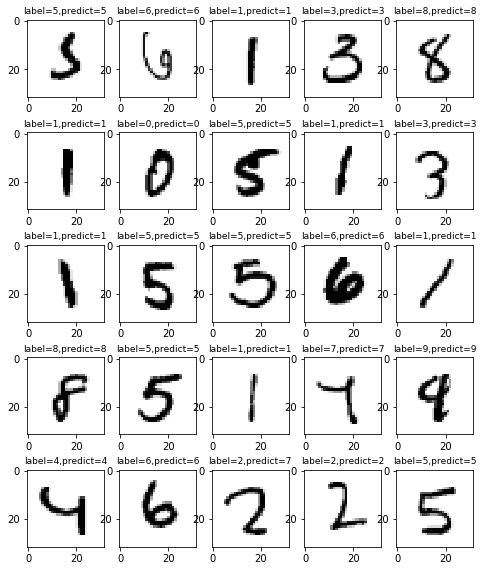

In [17]:
show_images_labels_predict(x_test,y_test_onehot,prediction,idx=340)

# confusion matrix

In [18]:
import pandas as pd
pd.crosstab(y_test,prediction,
            rownames=['label'],colnames=['predicat'])

predicat,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,2,0,0,1,2,2,5,0
1,0,1107,5,2,0,0,6,1,13,1
2,4,2,985,7,2,1,5,10,15,1
3,1,0,12,965,0,12,0,8,10,2
4,0,2,3,0,948,0,8,0,4,17
5,4,0,2,12,0,855,10,3,3,3
6,8,3,1,0,3,4,937,0,1,1
7,1,3,25,4,0,2,0,963,8,22
8,5,1,9,7,4,2,7,3,929,7
